In [217]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

%matplotlib inline

In [218]:
data = pd.read_csv('Car details v3.csv')
data = data.sample(frac=1)  #shuffle the data  for more distinct results

In [219]:
data.shape  #number of data points and features

(8128, 13)

In [220]:
data.describe(include = 'all')  

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907.000000,7907.000000,7912.000000,7653,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,239,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,200,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,693,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.418783,1458.625016,91.517919,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,4.037145,503.916303,35.822499,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.780000,1197.000000,68.050000,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,82.000000,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.320000,1582.000000,102.000000,NaN,5.000000


In [221]:
data.info()   #general vue on the data, there are categorical and numerical data, some aren't always present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 1124 to 7256
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7653 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 889.0+ KB


In [222]:
data['torque']= pd.to_numeric(data['torque'],errors='coerce') # Numeric Conversion of torque
data.info() # torque is now float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 1124 to 7256
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7645 non-null   float64
 12  seats          7907 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 889.0+ KB


In [223]:
data.corr()  #correlation matrix 
#We can see that the torque and max_power are strongly correlated (0.78), meaning we can get rid of torque

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9180\3278638536.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()  #correlation matrix


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,0.281948,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.625193,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.000304,0.227336
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.176069,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.642017,0.610309
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.785044,0.191999
torque,0.281948,0.625193,0.000304,-0.176069,0.642017,0.785044,1.000000,0.271092
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,0.271092,1.000000


In [224]:
data = data.drop(columns=['seller_type'],axis=1) #After testing,leaving or dropping this feature
                                                 # didn't make a lot of difference in the model, meaning its not necessary
data = data.drop(['torque'],axis=1)   #dropped because it's strongly correlated with max_power
maxpower = data['max_power']    
data['max_power']= maxpower.astype(float)  #numerical conversion
data.describe(include='all')

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,7907.000000,7907.000000,7912.000000,7907.000000
unique,2058,NaN,NaN,NaN,4,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Manual,First Owner,NaN,NaN,NaN,NaN
freq,129,NaN,NaN,NaN,4402,7078,5289,NaN,NaN,NaN,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,19.418783,1458.625016,91.517919,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,4.037145,503.916303,35.822499,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,16.780000,1197.000000,68.050000,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,19.300000,1248.000000,82.000000,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,22.320000,1582.000000,102.000000,5.000000


In [225]:
data.info()   #there are some null  features
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 1124 to 7256
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 762.0+ KB


name               0
year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
dtype: int64

In [226]:
#replacing the null values with the mean 
#this is better than simply deleting them, in order to augmente the data, rendering the predictions more accurate
data.mileage.fillna(data.mileage.mean(), inplace=True)
data.engine.fillna(data.engine.mean(), inplace=True)
data.seats.fillna(data.seats.mean(), inplace=True)
data.max_power.fillna(data.max_power.mean(), inplace=True)
data.isnull().sum() #all data is now not null

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [227]:
#splitting the data to trainning and testing sets 
from sklearn.model_selection import train_test_split
X =data.drop(['selling_price'],axis=1)
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)
X_train.shape, X_test.shape


((5445, 10), (2683, 10))

In [228]:
#encoding the categorical values as numerical, to be able to run them through the algorithm
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()


,name,year,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
717,1,2017,30000,1,1,1,20.630000,1198.000000,67.060000,5.000000
5104,2,2004,90000,1,2,2,19.418783,1458.625016,91.517919,5.416719
396,3,2009,214000,1,1,2,13.900000,1599.000000,103.200000,5.000000
4574,4,2018,22000,2,1,1,21.030000,1461.000000,65.000000,5.000000
3990,5,2017,52412,1,1,1,18.900000,998.000000,67.100000,5.000000


In [229]:
#The first algorithm used is the Decision tree regressor
#trainning the model
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=30,splitter='best')
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=30)

In [230]:
#testing the accuracy for the training and testuing data
#relatively good, no overfitting

score = regressor.score(X_train, y_train)
score2 = regressor.score(X_test, y_test)
print(score)
print(score2)



0.945469864320958
0.9264716616361139


In [231]:
#The second algorithm tested is the Random forest regressor
#trainning the model

from sklearn.ensemble import RandomForestRegressor
f_regressor = RandomForestRegressor(n_estimators = 40, random_state = 100)
f_regressor.fit(X_train,y_train)

#testing the accuracy
score3 = f_regressor.score(X_train, y_train)
score4 = f_regressor.score(X_test, y_test)
print(score3)
print(score4)

#The accuracy for the second algorithm is better, so it will be choosed


0.9939814529692865
0.968977825975967


In [232]:
# Using the forest's predict method on the test data
predictions = f_regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the average absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 70647.2 degrees.


[Text(0.5639204545454546, 0.9444444444444444, 'x[8] <= 172.915\nsquared_error = 662786214718.741\nsamples = 5445\nvalue = 636487.285'),
 Text(0.33238636363636365, 0.8333333333333334, 'x[8] <= 148.155\nsquared_error = 135693065032.3\nsamples = 5187\nvalue = 494438.263'),
 Text(0.1875, 0.7222222222222222, 'x[1] <= 2013.5\nsquared_error = 84798445637.841\nsamples = 5047\nvalue = 461159.356'),
 Text(0.09090909090909091, 0.6111111111111112, 'x[8] <= 96.35\nsquared_error = 30661671175.727\nsamples = 2180\nvalue = 274928.158'),
 Text(0.045454545454545456, 0.5, 'x[1] <= 2010.5\nsquared_error = 16479246568.752\nsamples = 1655\nvalue = 224194.808'),
 Text(0.022727272727272728, 0.3888888888888889, 'squared_error = 6848820337.715\nsamples = 802\nvalue = 155721.252'),
 Text(0.06818181818181818, 0.3888888888888889, 'squared_error = 16980847992.268\nsamples = 853\nvalue = 288574.4'),
 Text(0.13636363636363635, 0.5, 'x[1] <= 2011.5\nsquared_error = 41678373282.023\nsamples = 525\nvalue = 434859.004'),

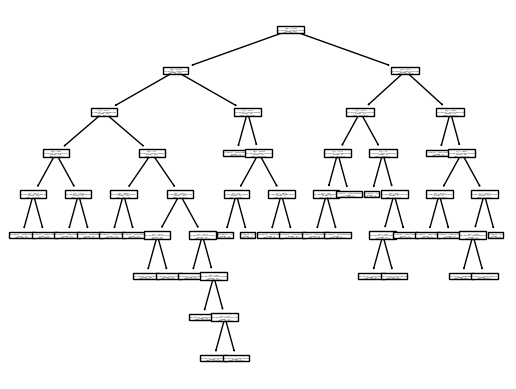

In [233]:
#plotting on of the the decision trees

from sklearn import tree
tree.plot_tree(regressor)


In [234]:
#An example of price anomaly detection

entry = pd.DataFrame.from_records([{'name':'Maruti 800 DX BSII','year':2001,'km_driven':5000,'fuel':'Petrol','transmission':'Manual','owner':'Second Owner','mileage':16.1,'engine':796,'max_power':37,'seats':4}])
entry = encoder.transform(entry)
input = 1000000
target= pd.DataFrame.from_records([{'selling_price':45000}]) 
predicted_price = regressor.predict(entry)
print(predicted_price)
if abs(input-predicted_price) > 100000:  #Error mean is 70000 so we use a value close enough to it
    print("Anomaly Detected")

[155721.25187032]
Anomaly Detected


In [235]:
def Price_Predictor(ChrLst): #ChrLst is a list of orderd characterestics name,year,km__driven,fuel,transmision,owner,mileage,engine,max_power,seats
    entry = pd.DataFrame.from_records([{'name':ChrLst[0],'year':ChrLst[1],'km_driven':ChrLst[2],'fuel':ChrLst[3],'transmission':ChrLst[4],'owner':ChrLst[5],'mileage':ChrLst[6],'engine':ChrLst[7],'max_power':ChrLst[8],'seats':ChrLst[9]}])
    entry = encoder.transform(entry)
    return f_regressor.predict(entry)[0]


Price_Predictor(['Maruti 800 DX BSII',2001,5000,'Petrol','Manual','Second Owner',16.1,796,37,4])


54375.0

In [236]:
def Price_Anomaly(ChrLst,input_price):
    if abs(input_price-Price_Predictor(ChrLst)) > 100000:
        return True
    else:
        return False

In [237]:
Price_Anomaly(['Maruti 800 DX BSII',2001,5000,'Petrol','Manual','Second Owner',16.1,796,37,4],100000)
#False : no Anomaly
#True  : no Anomaly

False